In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv', sep=',')
dataPredict = pd.read_csv('test.csv', sep=',')
pd.options.display.max_columns = None
pd.set_option('expand_frame_repr', False)
data.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_5,3.23,2007,15.0,15,9,9,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_3,0.00,2006,8.0,8,5,5,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,1,0,1,NaN,NaN,NaN,7.0,7,4,6,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [2]:
fdata = data
# .drop(['Education_level',
#                    'GPA',
#                    'year_graduated',
                   
#                    'Avg_achievement_%',
#                    'Last_achievement_%',
#                    'Achievement_above_100%_during3quartal',
#                    'achievement_target_1',
#                    'achievement_target_2',
#                    'achievement_target_3'
#                   ], 
#                   axis=1)


fdata2 = dataPredict
# .drop(['Education_level',
#                    'GPA',
#                    'year_graduated',
                   
#                    'Avg_achievement_%',
#                    'Last_achievement_%',
#                    'Achievement_above_100%_during3quartal',
#                    'achievement_target_1',
#                    'achievement_target_2',
#                    'achievement_target_3'
#                           ], 
#                   axis=1)

In [3]:
params = ['job_duration_in_current_branch', 
          'Last_achievement_%',
          'Avg_achievement_%',
          'annual leave',
          'job_duration_in_current_person_level',
          'age',
          'job_duration_in_current_job_level',
#              'job_duration_in_current_job_level', 
#              'job_duration_in_current_person_level', 
#              'job_rotation',
#              'age',
#              'branch_rotation',
             'Best Performance']
train_data = fdata[params]
train_data = train_data.rename(columns={'Best Performance':'best_performance'})
predict_data = fdata2[['job_duration_in_current_branch', 
                       'Last_achievement_%',
          'Avg_achievement_%',
          'annual leave',
          'job_duration_in_current_person_level',
          'age',
          'job_duration_in_current_job_level',
#              'job_duration_in_current_job_level', 
#              'job_duration_in_current_person_level', 
#              'job_rotation',
#              'age',
#              'branch_rotation'
                      ]]
train_data.head()

,job_duration_in_current_branch,Last_achievement_%,Avg_achievement_%,annual leave,job_duration_in_current_person_level,age,job_duration_in_current_job_level,best_performance
0,0.50,72.53,68.85,8,8.00,1964,8.00,0
1,1.25,101.13,94.81,3,2.00,1979,5.17,0
2,1.50,71.30,72.82,6,1.83,1980,1.83,0
3,0.17,90.09,86.89,3,4.00,1984,7.92,0
4,2.08,100.72,95.17,2,1.83,1984,1.83,1


In [4]:
# f1data = fdata.dropna()
# f1data_label = f1data['Best Performance']
# f1data = f1data.drop('Best Performance', axis = 1)
# #data_combine = f1data.append(fdata2)
# print(len(data_combine))
# print(len(f1data))
# #print(data.isnull().sum())
# f1data.head()

In [5]:
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# LE = LabelEncoder()

# data_combine['job_level'] = LE.fit_transform(data_combine['job_level'])
# data_combine['person_level'] = LE.fit_transform(data_combine['person_level'])
# data_combine['Employee_type'] = LE.fit_transform(data_combine['Employee_type'])
# data_combine['Employee_status'] = LE.fit_transform(data_combine['Employee_status'])
# data_combine['gender'] = LE.fit_transform(data_combine['gender'])
# data_combine['age'] = LE.fit_transform(data_combine['age'])
# data_combine['marital_status_maried(Y/N)'] = LE.fit_transform(data_combine['marital_status_maried(Y/N)'])
# data_combine

In [6]:
# pred_real_data = data_combine[len(data_combine)-6000:]
# data_for_train_test = data_combine[:len(data_combine)-6000]
# data_for_train_test = data_for_train_test.assign(best_performance=f1data_label.values)
# data_for_train_test

In [7]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,53 mins 41 secs
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_Rizky_Saputra_022xku
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.249 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [8]:
df = h2o.H2OFrame(train_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
df['best_performance'] = df['best_performance'].asfactor()
df['best_performance'].levels()

[['0', '1']]

In [10]:
y = 'best_performance'
x = list(train_data.columns)
x.remove(y)
# print(len(train), len(validate), len(test))

In [11]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |█
11:08:00.267: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%


In [12]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_20201220_110800,0.653561,0.346119,0.186733,0.392611,0.320859,0.10295
GBM_2_AutoML_20201220_110800,0.652041,0.346481,0.187418,0.396536,0.320939,0.103002
GBM_5_AutoML_20201220_110800,0.651885,0.346444,0.188481,0.389591,0.321144,0.103134
StackedEnsemble_AllModels_AutoML_20201220_110800,0.651827,0.349569,0.189676,0.388394,0.321323,0.103249
GBM_grid__1_AutoML_20201220_110800_model_1,0.651021,0.345078,0.187447,0.398836,0.320359,0.10263
GBM_3_AutoML_20201220_110800,0.649973,0.34763,0.185219,0.396333,0.321492,0.103357
StackedEnsemble_BestOfFamily_AutoML_20201220_110800,0.649248,0.351441,0.184391,0.392503,0.321912,0.103627
XRT_1_AutoML_20201220_110800,0.643656,0.35643,0.174244,0.394464,0.32523,0.105774
DRF_1_AutoML_20201220_110800,0.642475,0.361897,0.174225,0.393192,0.326629,0.106687
GBM_4_AutoML_20201220_110800,0.641607,0.351317,0.177205,0.388405,0.32307,0.104374


In [13]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

E:\Anaconda\envs\project1\lib\site-packages\h2o\estimators\stackedensemble.py:804: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


In [14]:
metalearner.coef_norm()

{'Intercept': -2.132750769302576,
 'GBM_1_AutoML_20201220_110800': 0.06686714925512856,
 'GBM_2_AutoML_20201220_110800': 0.023454438681108438,
 'GBM_5_AutoML_20201220_110800': 0.12669111888545986,
 'GBM_grid__1_AutoML_20201220_110800_model_1': 0.3284391352258166,
 'GBM_3_AutoML_20201220_110800': 0.0,
 'XRT_1_AutoML_20201220_110800': 0.044313524057201195,
 'DRF_1_AutoML_20201220_110800': 0.0,
 'GBM_4_AutoML_20201220_110800': 0.0,
 'DeepLearning_1_AutoML_20201220_110800': 0.1275151660116627,
 'GLM_1_AutoML_20201220_110800': 0.013547777668682218}

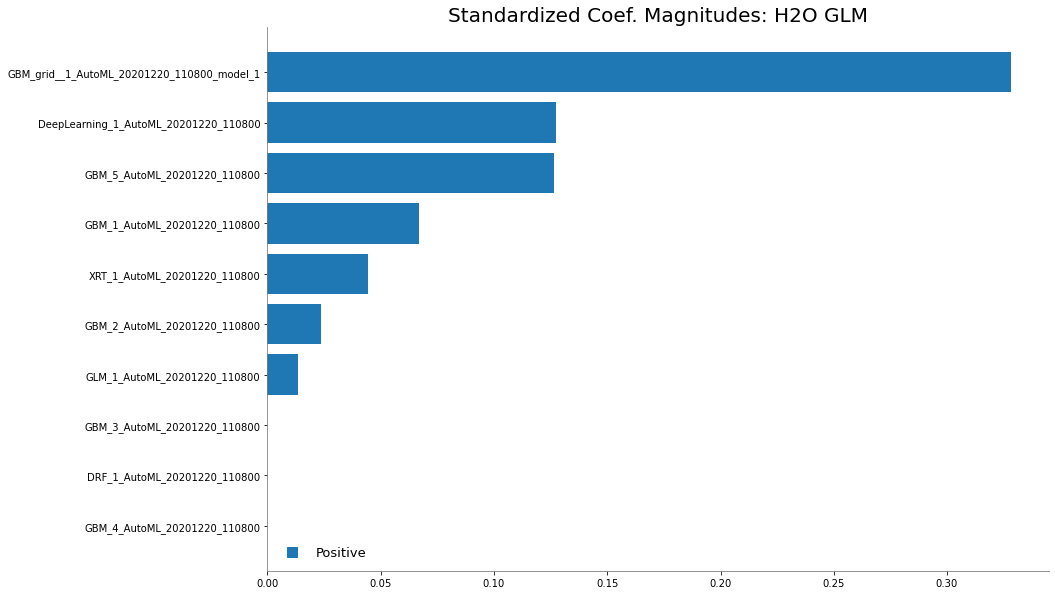

In [15]:
%matplotlib inline
metalearner.std_coef_plot()

Parse progress: |█████████████████████████████████████████████████████████| 100%
                               variable  relative_importance  scaled_importance  percentage
0  job_duration_in_current_person_level           312.432526           1.000000    0.253199
1                    Last_achievement_%           247.412537           0.791891    0.200506
2        job_duration_in_current_branch           204.944107           0.655963    0.166089
3     job_duration_in_current_job_level           143.691254           0.459911    0.116449
4                     Avg_achievement_%           143.691116           0.459911    0.116449
5                                   age           116.720352           0.373586    0.094592
6                          annual leave            65.048111           0.208199    0.052716


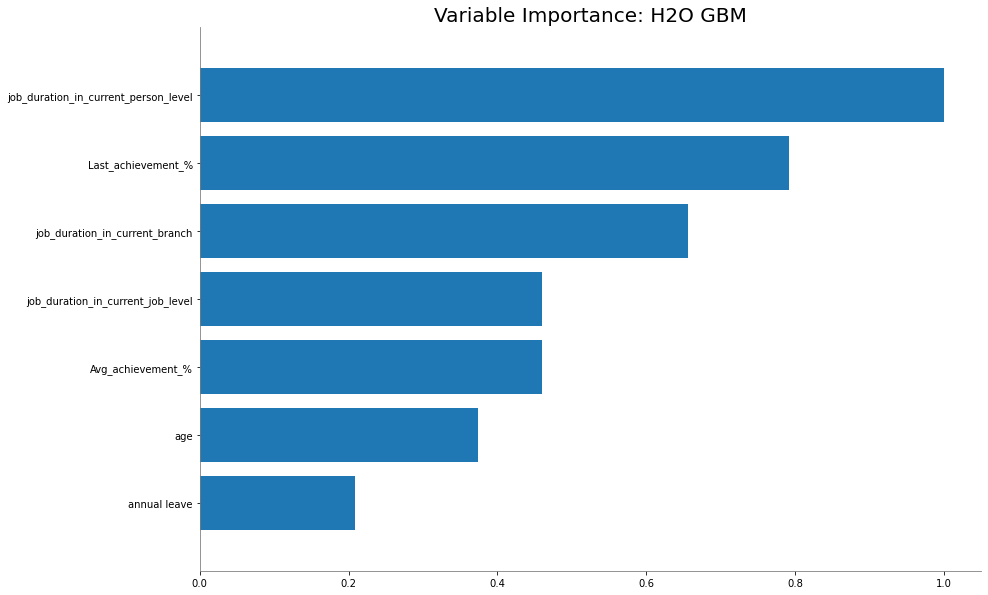

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [16]:
real_p = h2o.H2OFrame(predict_data)
auto = aml.leader
print(auto.varimp(use_pandas=True))
auto.varimp_plot()
res_pred = auto.predict(real_p)

In [22]:
df_ress = res_pred.as_data_frame()
print(auto.auc())


0.7746930014074517


In [18]:
df_res = pd.DataFrame(df_ress['p1'])
df_res.columns = ['Best Performance']
df_res['index'] = df_res.index
df_res = df_res[['index', 'Best Performance']]
print(df_res.head())
print(res_pred)
#print(df_res.max())

   index  Best Performance
0      0          0.116927
1      1          0.153255
2      2          0.165973
3      3          0.202503
4      4          0.096520


predict,p0,p1
0,0.883073,0.116927
0,0.846745,0.153255
1,0.834027,0.165973
1,0.797497,0.202503
0,0.90348,0.0965201
1,0.808751,0.191249
0,0.853061,0.146939
0,0.855531,0.144469
0,0.848408,0.151592
0,0.854697,0.145303


In [19]:
df_res.to_csv('pred_result_with_h2o_autoML_most5.csv', index=False)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
from sklearn.model_selection import train_test_split

train_data_sklearn = train_data
predict_data_sklearn = predict_data

data_for_train_test = train_data_sklearn[['job_duration_in_current_branch', 
             'job_duration_in_current_job_level', 
             'job_duration_in_current_person_level', 
             'job_rotation',
             'age',
             'branch_rotation']]
train_label = train_data_sklearn['best_performance']

X_train, X_test, y_train, y_test = train_test_split(data_for_train_test, train_label, test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=10)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

from sklearn.metrics import roc_auc_score
pred = clf.predict(X_test)
prob = clf.predict_proba(X_test).T[1]
valY = np.array(y_test) 
auc_score = roc_auc_score(valY, prob)

print(auc_score)

KeyError: "['branch_rotation', 'job_rotation'] not in index"

In [ ]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
logModel.fit(X_train, y_train)
pred_log = logModel.predict(X_test)
prob_log = logModel.predict_proba(X_test).T[1] 
auc_score_log = roc_auc_score(valY, prob_log)
print(auc_score_log, logModel.coef_)